[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [ ]:
import pandas as pd

# Read the data

In [ ]:
data = pd.read_csv('/content/athlete_events.csv')

In [ ]:
data.sample()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
206998,103887,Fumio Ryosenan,M,33.0,168.0,61.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN


### Don't forget to drop duplicates first

In [ ]:
data.drop_duplicates(subset=data.columns)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [ ]:
data.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

### Number of males and females

In [ ]:
data['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

### How many cities do we have and what are they ?

In [ ]:
c = dict(data['City'].value_counts())
x= list(c.keys())
print(f'How many cities we have in dataset : {len(x)}')
print(x)

How many cities we have in dataset : 42
['London', 'Athina', 'Sydney', 'Atlanta', 'Rio de Janeiro', 'Beijing', 'Barcelona', 'Los Angeles', 'Seoul', 'Munich', 'Montreal', 'Mexico City', 'Helsinki', 'Roma', 'Tokyo', 'Moskva', 'Paris', 'Berlin', 'Amsterdam', 'Sochi', 'Melbourne', 'Vancouver', 'Torino', 'Stockholm', 'Antwerpen', 'Salt Lake City', 'Innsbruck', 'Nagano', 'Albertville', 'Lillehammer', 'Calgary', 'Sarajevo', 'Lake Placid', 'Grenoble', 'Sankt Moritz', 'Sapporo', "Cortina d'Ampezzo", 'St. Louis', 'Squaw Valley', 'Oslo', 'Garmisch-Partenkirchen', 'Chamonix']


# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year

In [ ]:
s = dict(data['Year'].value_counts())

In [ ]:
SS = pd.Series(s)
pd.DataFrame(SS,columns=['Num athlete']).T

,1992,1988,2000,1996,2016,2008,2004,2012,1972,1984,...,2002,1912,1998,1932,1994,1908,1900,1906,1904,1896
Num athlete,16413,14676,13821,13780,13688,13602,13443,12920,11959,11588,...,4109,4040,3605,3321,3160,3101,1936,1733,1301,380


### Which athlete participated the most? (his/her name and ID)

In [ ]:
data[data['Name']  == data['Name'].max()][['ID','Name']]

,ID,Name
102955,52087,zzet nce
102956,52087,zzet nce


# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this 
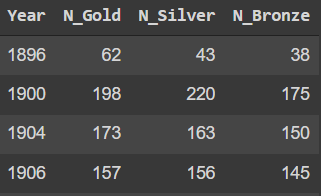

In [ ]:
data2 = data[data['Medal'].isna() == False]
data3= data2[['Year','Medal']]

In [ ]:
dict1 = {}
for i in [1896, 1900, 1904, 1906]:
  d = data3[data.Year == i]
  d = d['Medal']
  dict1.update({i:dict(d.value_counts())})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
pd.DataFrame(dict1).T

,Gold,Silver,Bronze
1896,62,43,38
1900,201,228,175
1904,173,163,150
1906,157,156,145


# <font color='red'>**You are Geek!**</fond>

### What is the number of winners with the gold medal in each city?

In [ ]:
data2[data2['Medal']=='Gold'][['City']].value_counts()

City                  
London                    1215
Athina                     883
Los Angeles                726
Beijing                    671
Rio de Janeiro             665
Sydney                     663
Atlanta                    608
Barcelona                  559
Seoul                      520
Antwerpen                  493
Paris                      478
Moskva                     457
Montreal                   438
Munich                     404
Mexico City                359
Tokyo                      347
Stockholm                  338
Berlin                     312
Roma                       309
Helsinki                   306
Melbourne                  290
Amsterdam                  245
Sochi                      202
Torino                     176
Vancouver                  174
St. Louis                  173
Salt Lake City             162
Nagano                     145
Innsbruck                  131
Lillehammer                110
Albertville                104
Lake Placid     

### Find the total missing data for each year?

In [ ]:
listyear = list(dict(data['Year'].value_counts()).keys())
dictnayear = {}
for i in listyear:
  datay = data[data['Year']==i]
  na = datay.isna().sum().sum()
  dictnayear.update({i:na})
  pass


In [ ]:
pd.DataFrame({'Year':list(dictnayear.keys()),
              'mising val':list(dictnayear.values())})

,Year,mising val
0,1992,20759
1,1988,14802
2,2000,12067
3,1996,15638
4,2016,12064
5,2008,11866
6,2004,11515
7,2012,11507
8,1972,11331
9,1984,11307
